In [1]:
from cpr.Nivel import Nivel
import cpr.information as info
import datetime
import numpy as np

/usr/local/lib/python3.6/dist-packages/wmf/wmf.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mcano/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mcano/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mcano/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/home/mcano/.local/lib/python3.6/site-

In [2]:
info.LOCAL

{'host': 'localhost',
 'user': 'sample_user',
 'passwd': 's@mple_p@ss',
 'table': 'estaciones',
 'dbname': 'cpr',
 'port': 3306}

In [3]:
self = Nivel(codigo=93,SimuBasin=True,**info.LOCAL)
info.REMOTE['host'] = 'localhost'

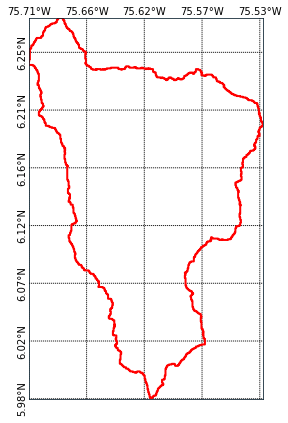

(<mpl_toolkits.basemap.Basemap at 0x7fd717093198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd717114940>)

In [4]:
self.Plot_basin()

In [5]:
from wmf import wmf
wmf.models.show_storage = 0
wmf.models.show_mean_speed = 0
wmf.models.retorno = 1
wmf.models.separate_fluxes = 1
wmf.models.sim_sediments = 0
wmf.models.show_mean_speed = 1
wmf.models.show_speed = 1

In [6]:
start = '2018-04-15'
end = '2018-04-18'

In [7]:
level = self.level(start,end)

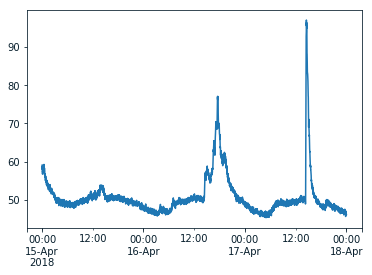

In [8]:
level.plot()

In [9]:
start = '2018-04-16 12:00'
end = '2018-04-17 02:00'

In [10]:
rain = self.radar_rain(start,end)

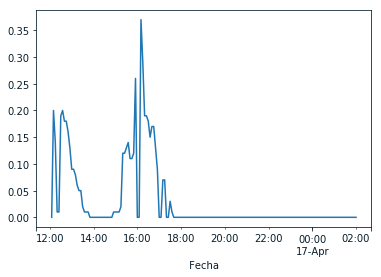

In [11]:
rain.plot()

In [12]:
vect = self.radar_rain_vect(start,end)

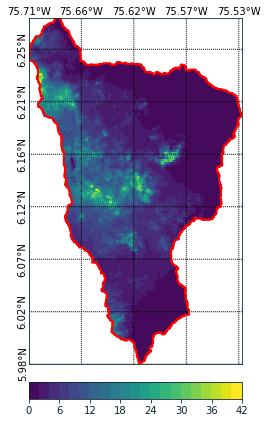

(<mpl_toolkits.basemap.Basemap at 0x7fd714c6d048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd714b3c5f8>)

In [13]:
self.Plot_basin(vec =  vect.sum().values/1000.0)

In [14]:
filepath = '/home/mcano/dev/cprweb/src/media/user_output/radar/201804161200-201804170200-93-sample_user'

In [15]:
n_intervals = 10
Calibracion = [5.0, 2.0, 10.0, 0.0, 0.008, 5.0, 2.3, 2.0, 1.0, 1.0]
Run = self.run_shia(Calibracion,
             filepath + '.bin',
             N_intervals = n_intervals,
             EvpVariable = True)

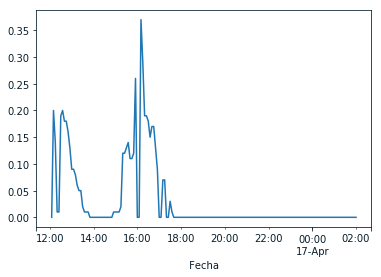

In [16]:
kwargs =  {
        'start':start,
        'end':end,
        'cuenca':self.nc_path,
        'rutaNc':self.radar_path,
        'rutaRes':self.rain_path+self.file_format(start,end),
        'dt':300,
        'umbral': 0.005,
        'verbose':True,
        'super_verbose':True,
        'old':None,
        'save_class':None,
        'store_true':None,
        'save_escenarios':None,
        'store_true':None,
       }

self.radar_rain(start,end).plot()

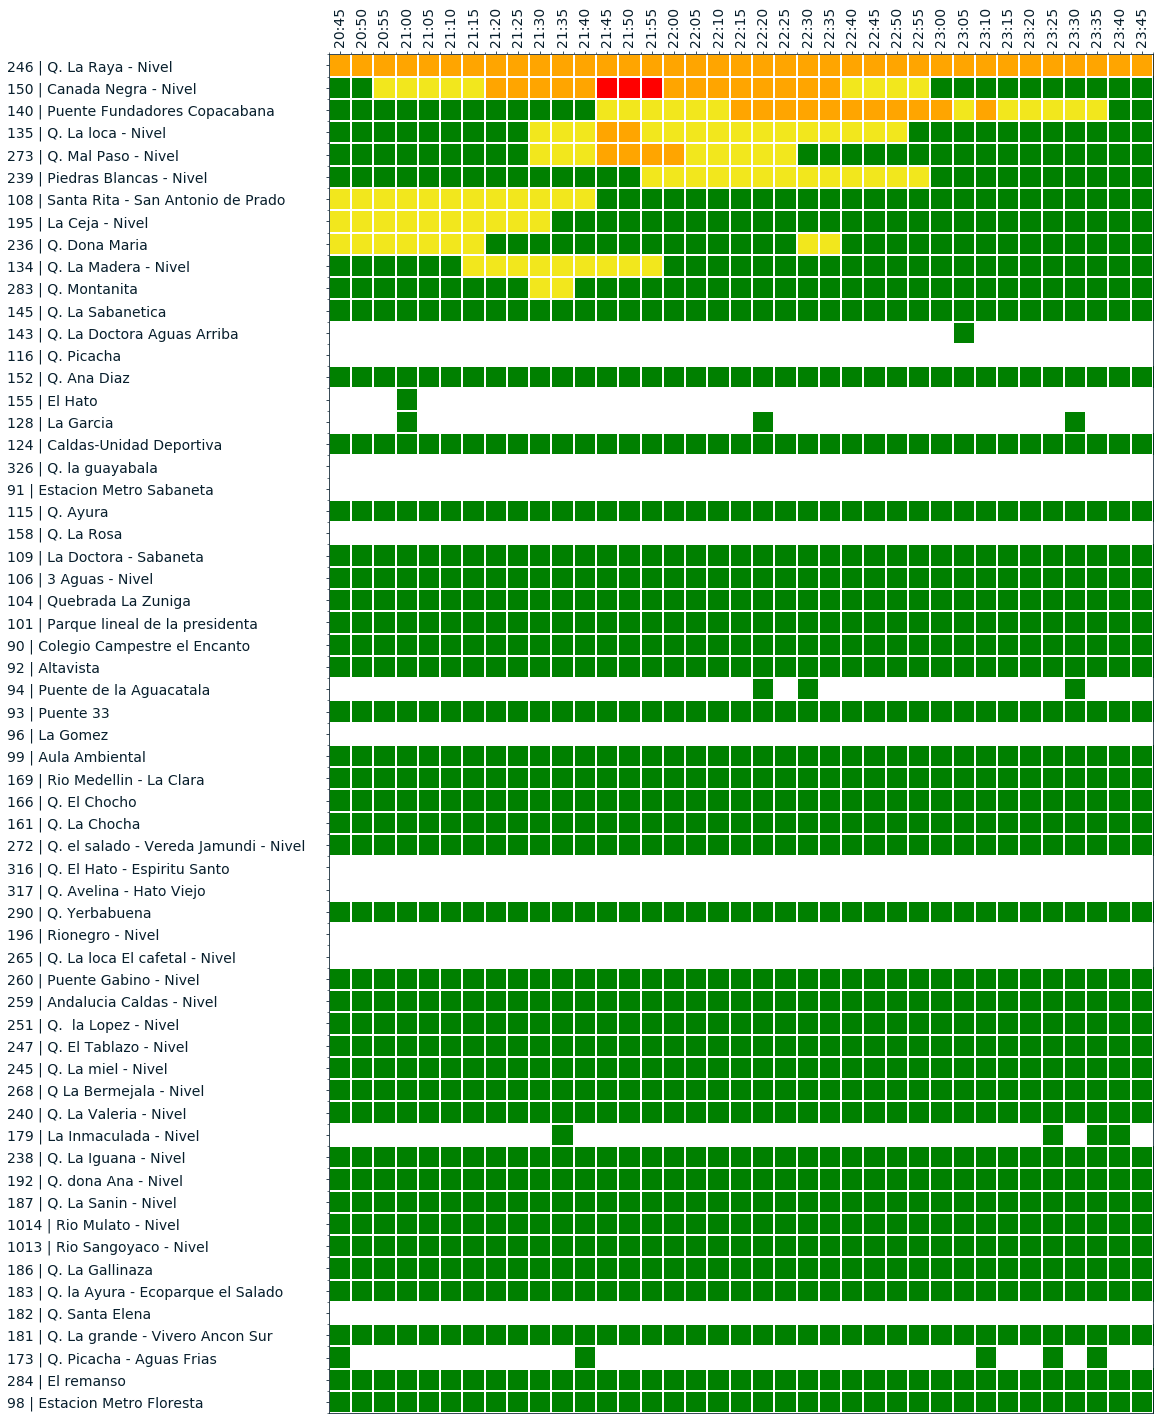

In [17]:
self.reporte_nivel()

In [18]:
import matplotlib.pyplot as plt

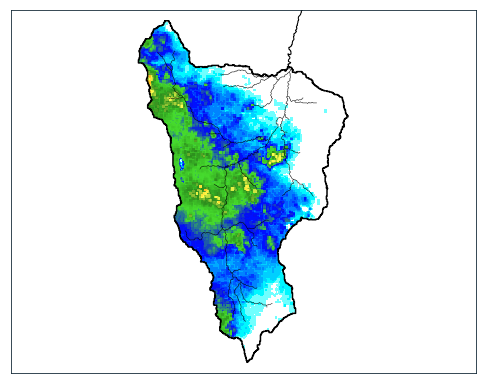

In [19]:
self.plot_basin_rain(vec=vect.sum().values/1000.)

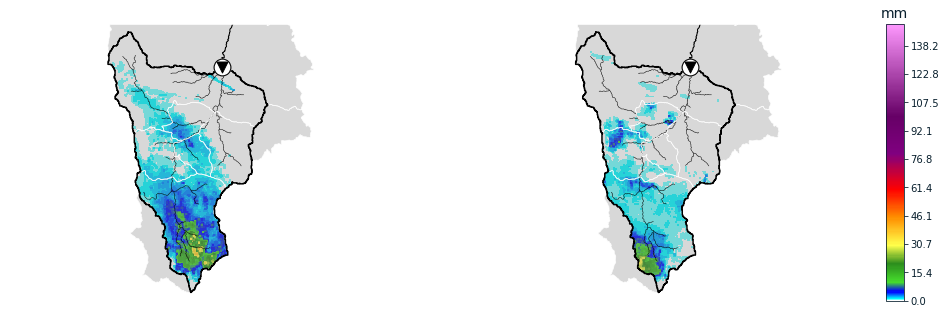

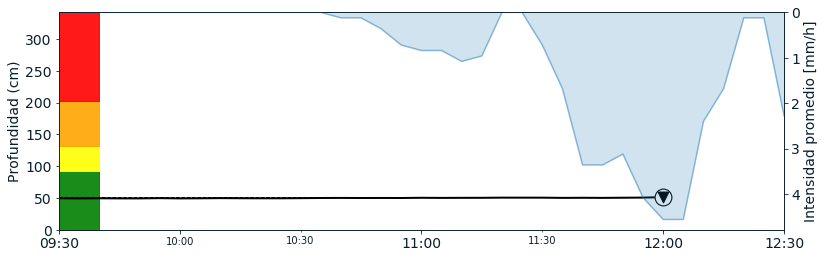

In [20]:
self.rain_report(start)

In [23]:
fk_id = self.read_sql("SELECT id,fecha from myusers_item where item_fk_id = '%s'"%self.info.id).sort_values('fecha').loc[0,'id']
last_bat = self.read_sql('SELECT * FROM myusers_topo where fk_id = "%s"'%fk_id)

In [24]:
last_bat.sort_values('vertical')[['vertical','x','y']]

,vertical,x,y
0,1,-2.00,3.15
1,2,0.00,3.15
2,3,0.87,2.83
3,4,3.27,1.32
4,5,4.33,0.93
5,6,7.17,-0.37
6,7,9.17,-0.14
7,8,11.17,-0.15
8,9,13.17,-0.14
9,10,15.17,-0.18


/usr/local/lib/python3.6/dist-packages/cpr/Nivel.py:1003: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  x,lamina = (series.argmax(),series.max())
/usr/local/lib/python3.6/dist-packages/cpr/Nivel.py:1121: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  ax.annotate(u'máximo', (mdates.date2num(series.argmax()), series.max()), xytext=(10, 10),textcoords='offset points',fontsize=14)
/usr/local/lib/python3.6/dist-packages/cpr/Nivel.py:1142: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd71144b208>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd711e0be80>)

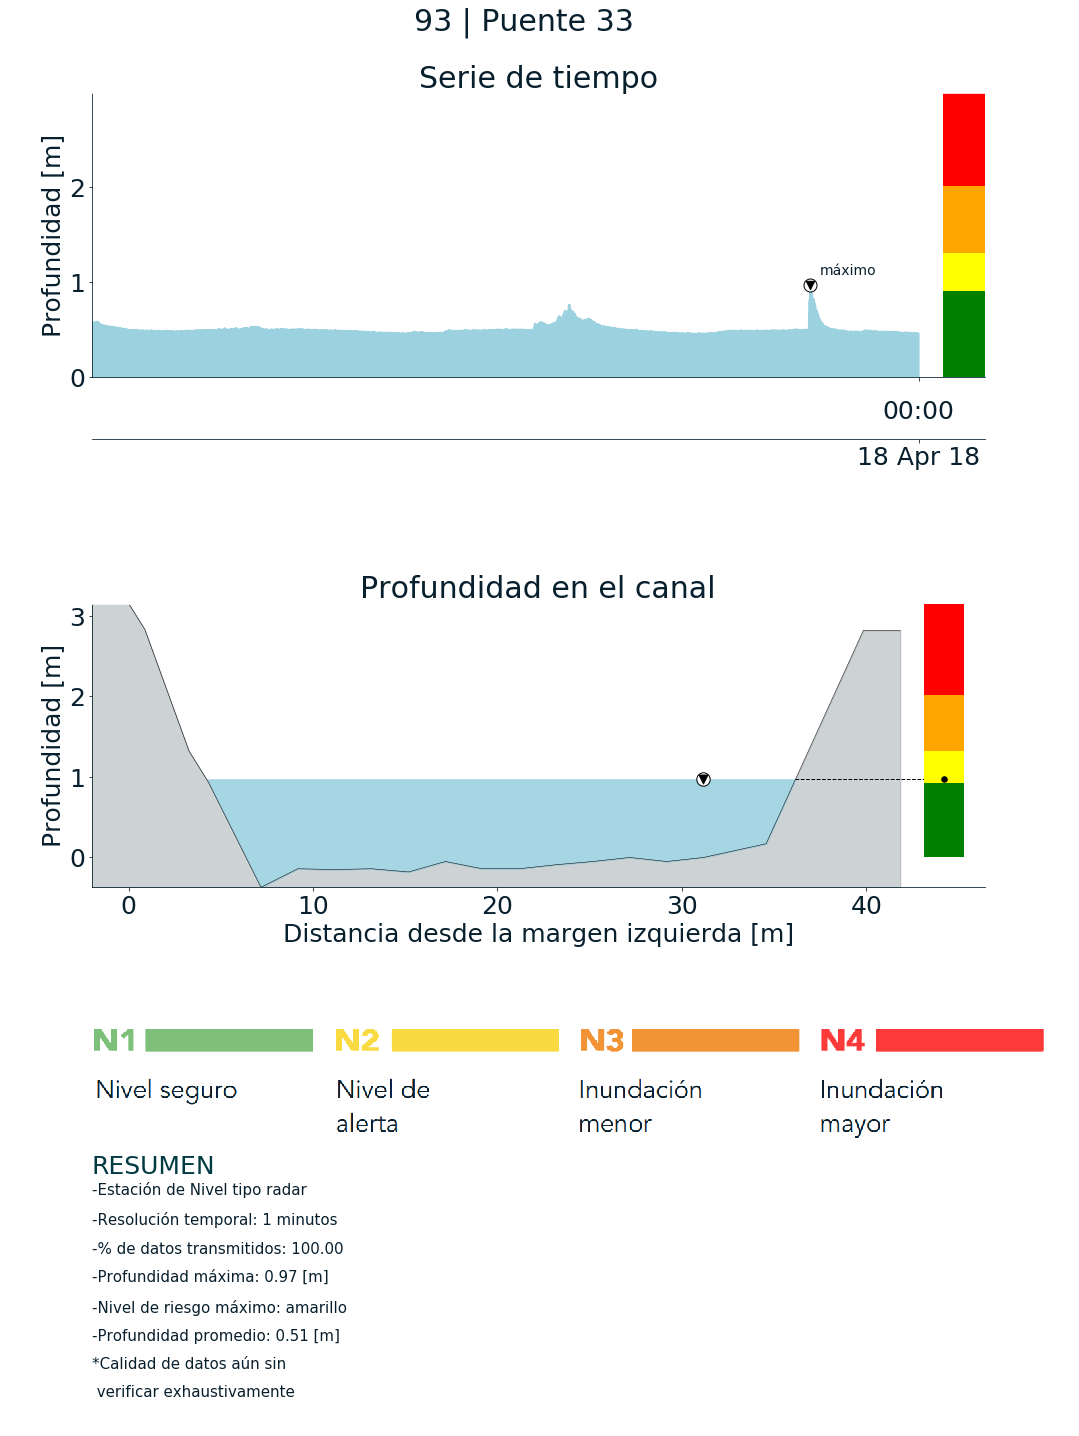

In [25]:
self.plot_operacional(level/100.0,last_bat.set_index('vertical')[['x','y']],'3d',self.data_path+'borrar.png')